## Uvod

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [48]:
path = os.path.join(os.getcwd(),'heart_disease_uci.csv')
df = pd.read_csv(path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [49]:
df.set_index('id', inplace = True)
df.drop('dataset', axis = 1, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Upoznavanje s podacima i vizualizacija

In [50]:
df.shape

(920, 14)

- 920 primjera, 14 značajki

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.8+ KB


- svi stupci osim 'age, sex, cp i num' nemaju svih 920 vrijednosti.

Kratki opis značajki:
  - age: godine
  - sex: spol
  - CP: bol u prsima (klase)
  - trestbps: blood pressure (tlak u mirovanju pacijenta)
  - chol: razina kolesterola
  - fbs: fasting blood sugar (razina šećera u krvi, 1 za >120 mg/dl)
  - restecg: rezultati ekg analize (klase)
  - thalch: Thalium test/max. puls srca (rezultati)
  - exang: angina izazvana tjelovježbom (0/1)
  - oldpeak/slope: depresija ST spojnice (iznosi/klase)
  - ca: rezultati fluoroskopskog testa (broj obojanih žila)
  - thal: slično thalch (rezultati testa/klase)


In [52]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

* kandidati za izbacivanje po primjerima: restecg, chol

* kandidati za izbacivanje po značajkama: thal, ca

* kandidati za popunjavanje: trestbps, fbs, thalch, exang, oldpeak, slope(?)

Prije toga još malo upoznavanja s podacima

In [53]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Chol, oldpeak i ca su značajke koje bi mogle imati stršeće vrijednosti.

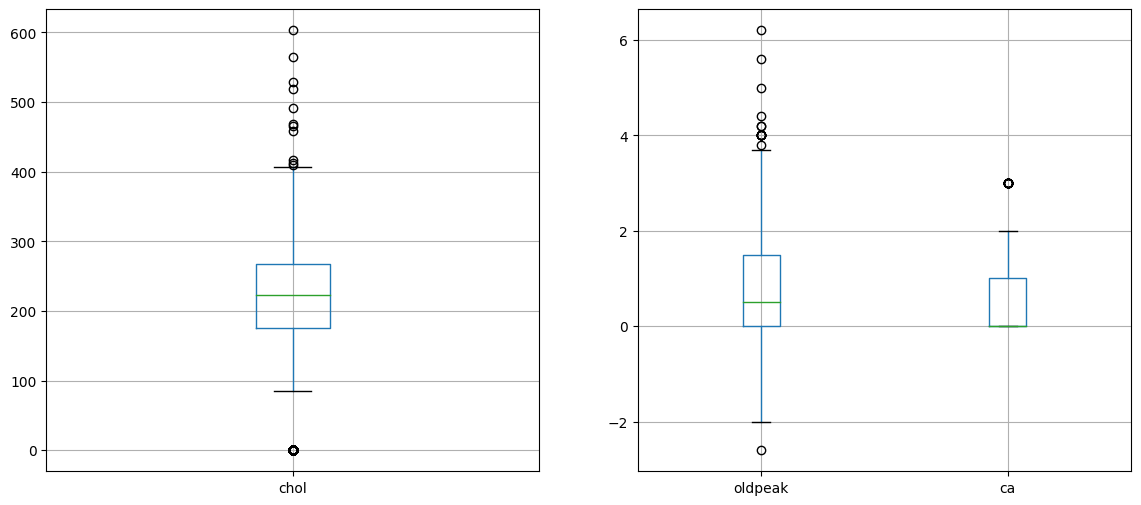

In [54]:
plt.figure(figsize = (14,6))
plt.subplot(121)
df.boxplot('chol')
plt.subplot(122)
df.boxplot(['oldpeak','ca'])
plt.show()

Negativne vrijednosti?

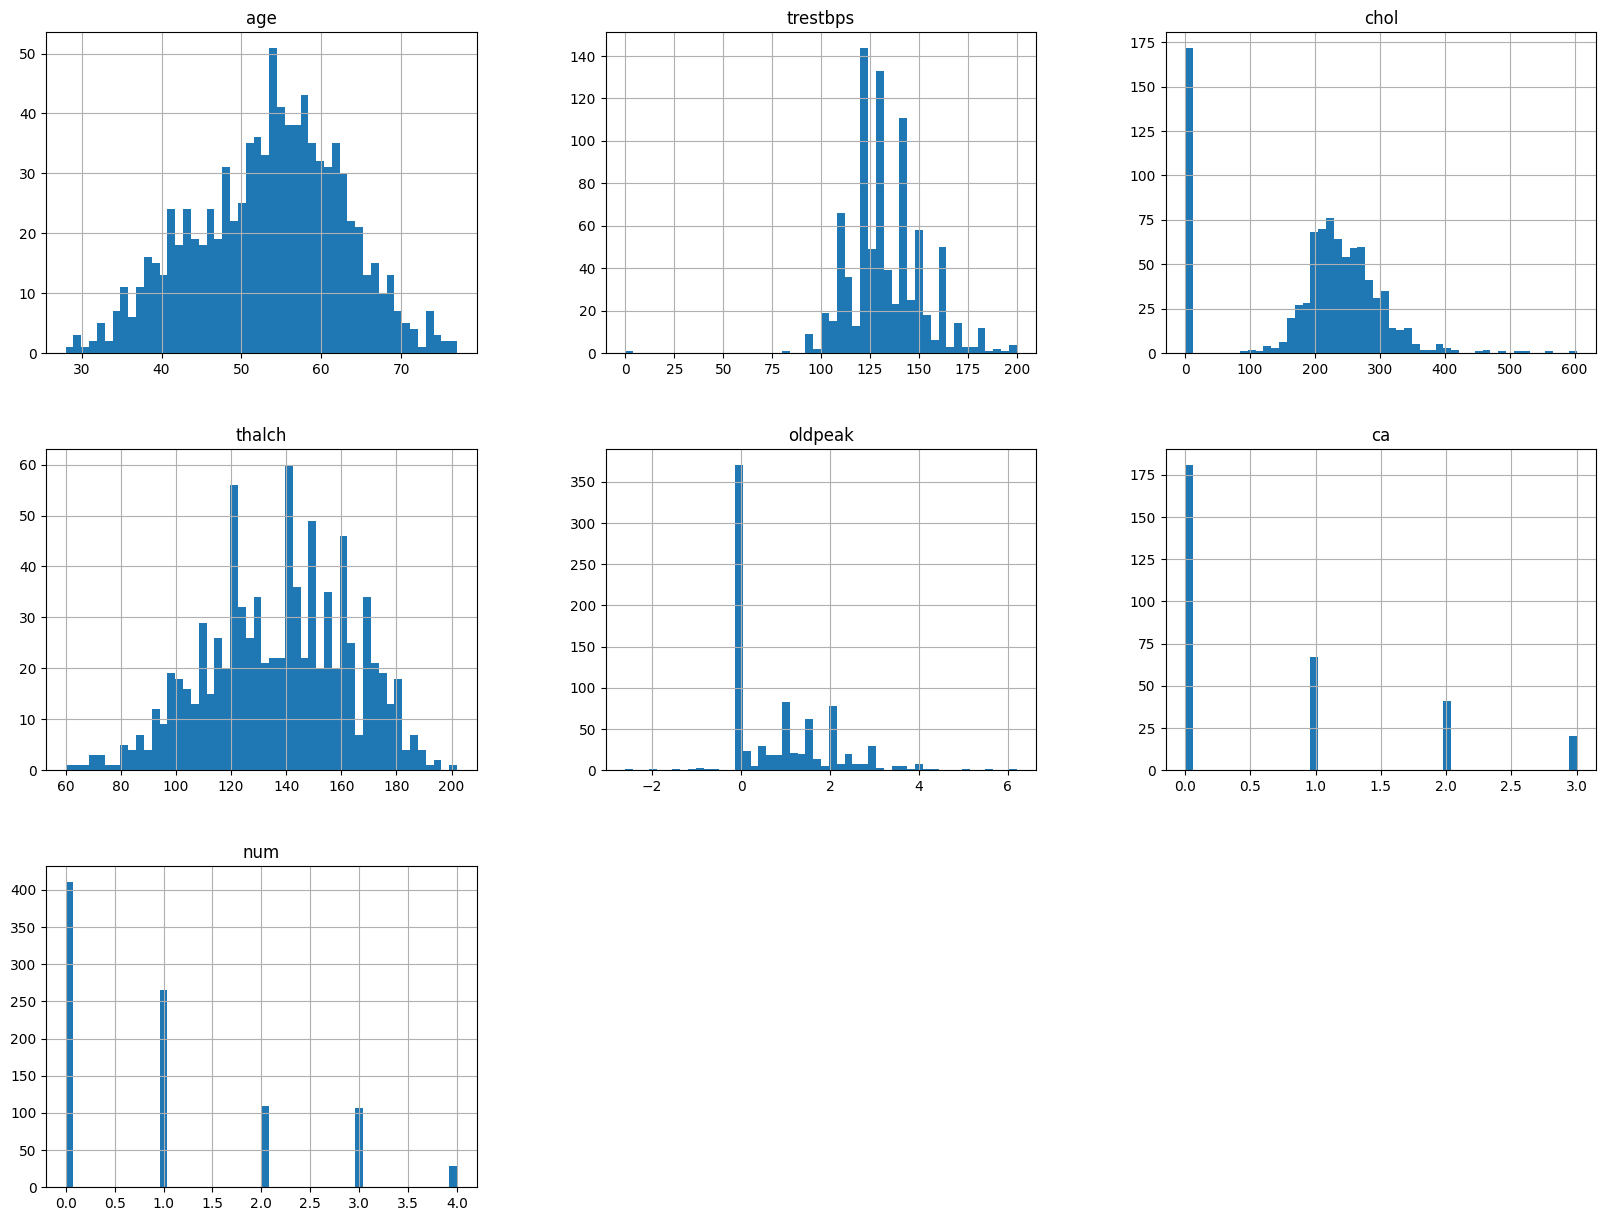

In [55]:
df.hist(bins = 50, figsize = (20,15)) # želimo pronaći još negativnih vrijednosti ili stšećih podataka
plt.show()

In [56]:
print('Broj zapisa s negativnim oldpeak-om: ',(df['oldpeak'] < 0).sum())
print('Broj zapisa s preniskim tlakom: ',(df['trestbps'] <= 0).sum())
print('Broj zapisa s razinom kolesterola jednakoj nuli: ',(df['chol'] <= 0).sum())
print('Broj klasifikacija koje su različite od 0 ili 1: ',(df['num'] > 1.0).sum())

Broj zapisa s negativnim oldpeak-om:  12
Broj zapisa s preniskim tlakom:  1
Broj zapisa s razinom kolesterola jednakoj nuli:  172
Broj klasifikacija koje su različite od 0 ili 1:  244


Zaključci:
  * Broj zapisa kolesterola koji su NaN ili 0 zbrojeno daje 202 - ne isplati se izbacivati primjere već ih zamijeniti srednjim vrijednostima
  * Zapis s tlakom 0 može se zamijeniti srednjom vrijednošću.
  * Broj zapisa oldpeak koji su NaN ili negativni zbrojeno daje 74 - može ih se zamijeniti srednjom vrijednošću.
  * Kako promijeniti klasifikacije koje nisu 0 ili 1?

In [57]:
df_2 = df # stvaramo novi dataframe
df_2.shape

(920, 14)

In [58]:
df_2 = df.loc[df.restecg.notna(),:]
df_2.shape
#izbacivanje primjera

(918, 14)

In [59]:
df_2.drop(['thal','ca'], axis = 1, inplace = True)
df_2.shape
#izbacivanje stupaca

<ipython-input-59-a2d05f90fe41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(['thal','ca'], axis = 1, inplace = True)


(918, 12)

In [60]:
df_2.nunique()

age          50
sex           2
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
num           5
dtype: int64

Popunjavamo NaN vrijedosti sa srednjim vrijednostima:

In [61]:
df_2.loc[(df_2.chol.isna() + (df_2.chol<= 0)),'chol'] = df.loc[:,'chol'].mean()
df_2.loc[(df_2.oldpeak.isna() + (df_2.oldpeak < 0)),'oldpeak'] = df.loc[:,'oldpeak'].mean()
df_2.loc[(df_2.trestbps.isna() + (df_2.trestbps <= 0)), 'trestbps'] = df.loc[:,'trestbps'].mean()
df_2.loc[df_2.thalch.isna(), 'thalch'] = df.loc[:,'thalch'].mean()

In [62]:
df_2.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          89
restecg       0
thalch        0
exang        55
oldpeak       0
slope       308
num           0
dtype: int64

Riješili smo sve probleme sa značajkama koje imaju kontinuirane vrijednosti, ostaje pozabaviti se s diskretnim vrijednostima (klasama).

Spol kodiramo pomoću OneHotEncodera:

In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df_2[['sex']])
df_tmp = ohe.transform(df_2[['sex']]).toarray()
df_tmp = pd.DataFrame(df_tmp, index = df_2.index, columns = ohe.get_feature_names_out())
df_2 = pd.concat((df_2,df_tmp), axis = 1)
df_2.drop('sex', axis = 1, inplace = True)
df_2.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,sex_Female,sex_Male
id,,,,,,,,,,,,,
1,63,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,0.0,1.0
2,67,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2,0.0,1.0
3,67,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1,0.0,1.0
4,37,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0,0.0,1.0
5,41,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,1.0,0.0


Cp, restecg i slope također treba transformirati u vrijednosti razumljive računalu, ali OneHotEncoder metoda stvorila bi 9 novih stupaca, pa umjesto toga transformaciju radimo pomoću Label Encodera:

In [41]:
# ovo napraviti nakon popunjavanja NaN vrijednosti
le = LabelEncoder().fit_transform(df_2['slope'])
df_2.loc[:,'slope'] = le

<ipython-input-41-0e74f16531d1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_2.loc[:,'slope'] = le


In [64]:
from sklearn.preprocessing import LabelEncoder
le_cp = LabelEncoder().fit_transform(df_2['cp'])
df_2.loc[:,'cp'] = le_cp

<ipython-input-64-208c66d5352a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_2.loc[:,'cp'] = le_cp


In [65]:
le_restecg = LabelEncoder().fit_transform(df_2['restecg'])
df_2.loc[:,'restecg'] = le_restecg
df_2.tail()

<ipython-input-65-82913cf9deba>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_2.loc[:,'restecg'] = le_restecg


,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,sex_Female,sex_Male
id,,,,,,,,,,,,,
916,54,0,127.000000,333.0,True,2,154.000000,False,0.000000,NaN,1,1.0,0.0
917,62,3,132.132404,139.0,False,2,137.545665,NaN,0.878788,NaN,0,0.0,1.0
918,55,0,122.000000,223.0,True,2,100.000000,False,0.000000,NaN,2,0.0,1.0
919,58,0,132.132404,385.0,True,0,137.545665,NaN,0.878788,NaN,0,0.0,1.0
920,62,1,120.000000,254.0,False,0,93.000000,True,0.000000,NaN,1,0.0,1.0


Fbs i exang bi bolje bilo transformirati u 0/1:


In [66]:
df_2.replace({True : int(1), False : int(0)}, inplace = True)
df_2[['fbs','exang']].head(2)

,fbs,exang
id,,
1,1.0,0.0
2,0.0,1.0


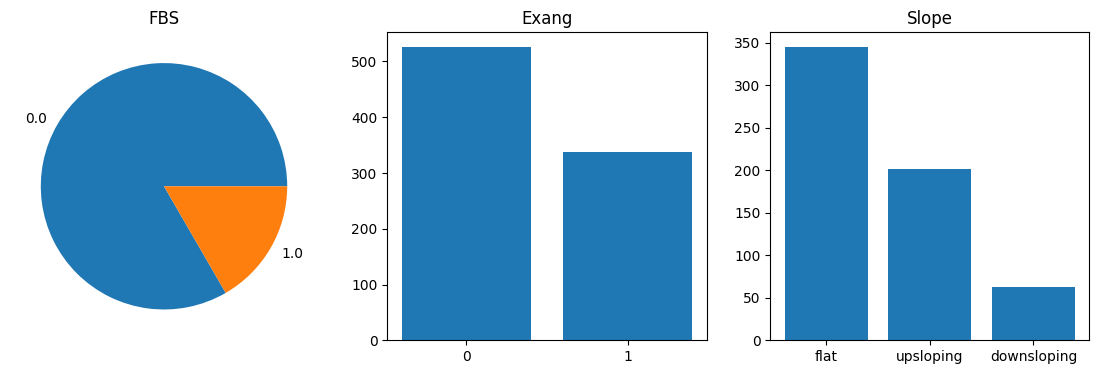

In [68]:
plt.figure(figsize = (14,4))
plt.subplot(131)
plt.pie(df_2['fbs'].value_counts(), labels = df_2.fbs.value_counts().index)
plt.title('FBS')
plt.subplot(132)
plt.bar(df_2.exang.value_counts().index, df_2.exang.value_counts())
plt.title('Exang')
plt.xticks([0,1])
plt.subplot(133)
plt.bar(df_2.slope.value_counts().index, df_2.slope.value_counts())
plt.title('Slope')
plt.show()



FBS popunjavamo pomoću moda skupa, Exang i Slope pomoću k-means algoritma

In [71]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 1 to 920
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         918 non-null    int64  
 1   cp          918 non-null    int64  
 2   trestbps    918 non-null    float64
 3   chol        918 non-null    float64
 4   fbs         829 non-null    float64
 5   restecg     918 non-null    int64  
 6   thalch      918 non-null    float64
 7   exang       863 non-null    float64
 8   oldpeak     918 non-null    float64
 9   slope       610 non-null    object 
 10  num         918 non-null    int64  
 11  sex_Female  918 non-null    float64
 12  sex_Male    918 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 100.4+ KB


Exang:

In [76]:
from sklearn.cluster import KMeans
attr = ['age','cp', 'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak']  # značajke koje nemaju NaN ili nisu tipa object
X_train, y_train = df_2.loc[df_2.exang.notnull(), attr], df_2.loc[df_2.exang.notnull(), 'exang']
model = KMeans(n_clusters = 2)
model.fit(X_train, y_train)
exang_pred = model.predict(df_2.loc[df_2.exang.isnull(), attr])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Slope:

In [77]:
X_train, y_train = df_2.loc[df_2.slope.notnull(), attr], df_2.loc[df_2.slope.notnull(), 'slope']
model = KMeans(n_clusters = 3)
model.fit(X_train, y_train)
slope_pred = model.predict(df_2.loc[df_2.slope.isnull(),attr])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
df_2.loc[df_2.exang.isnull(),'exang'] = exang_pred
df_2.loc[df_2.slope.isnull(),'slope'] = slope_pred

In [79]:
df_2['fbs'].replace(np.nan, int(0), inplace = True)

In [80]:
df_2.isna().sum()

age           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
num           0
sex_Female    0
sex_Male      0
dtype: int64

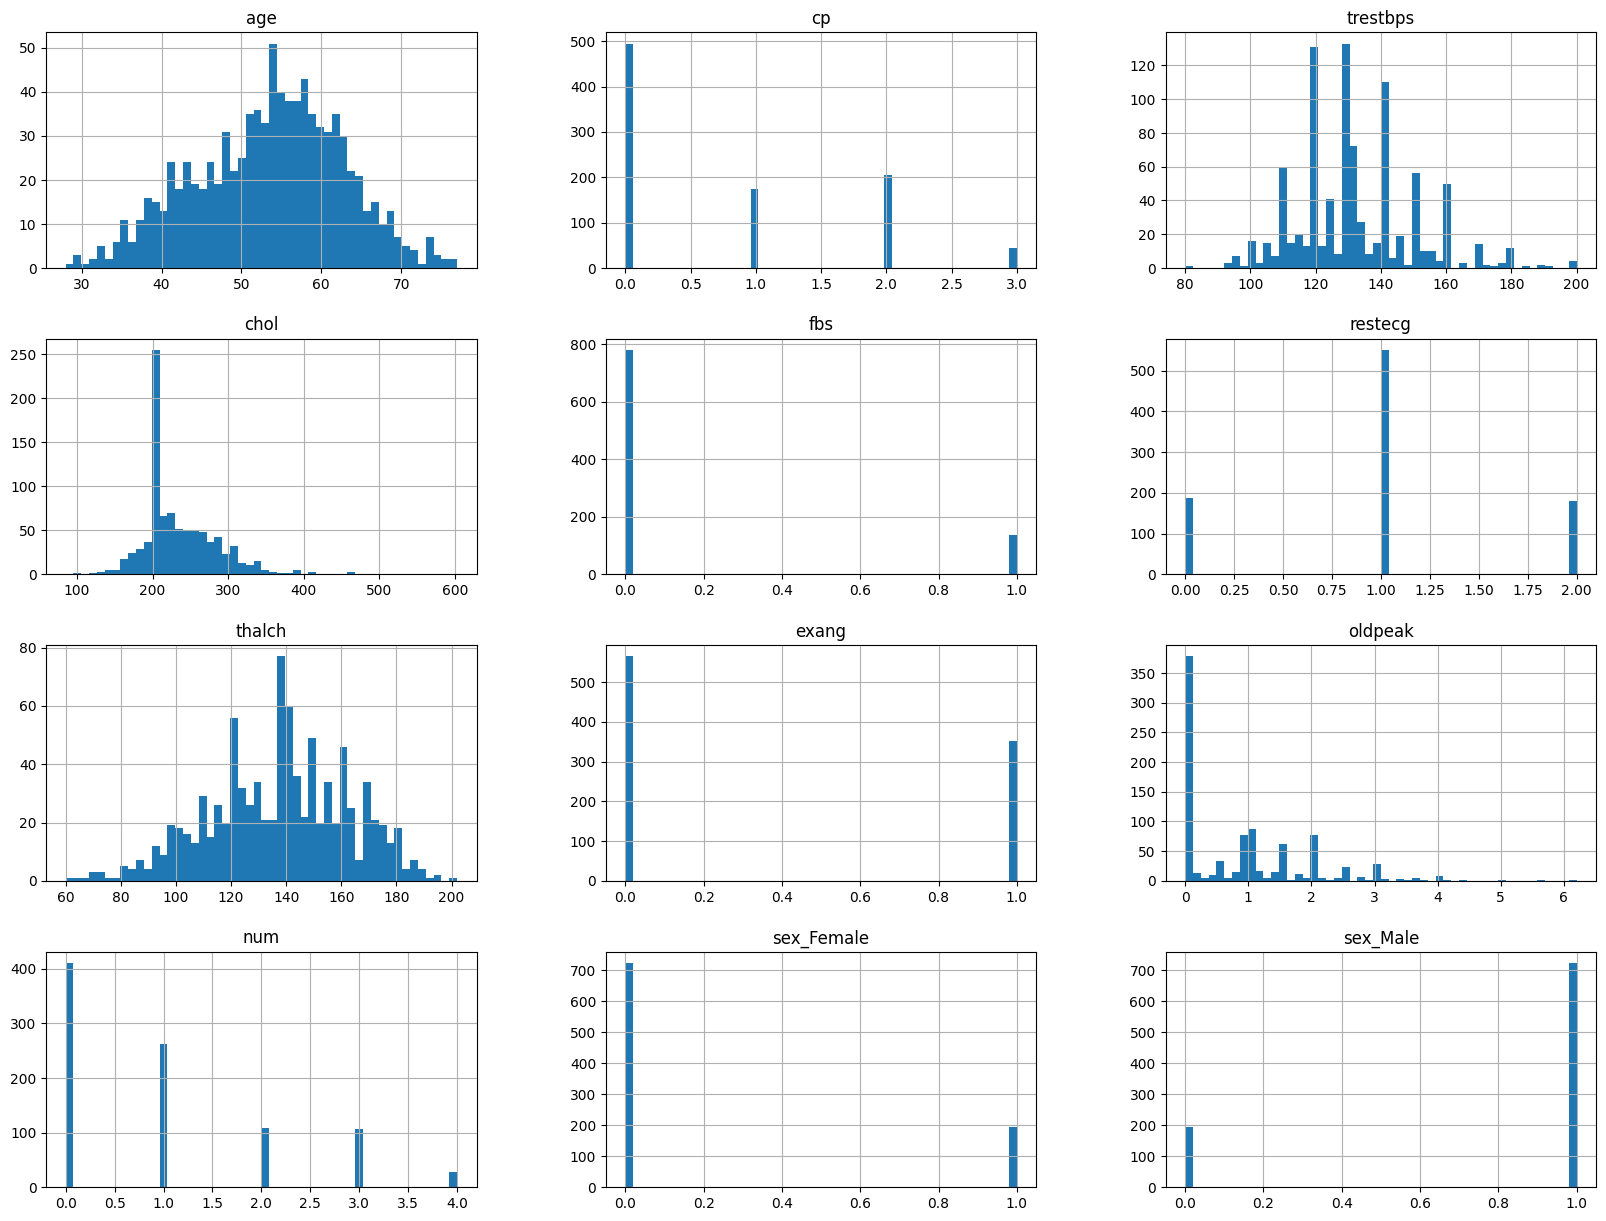

In [81]:
df_2.hist(bins = 50, figsize = (20,15))
plt.show()

In [82]:
df_2.tail()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,sex_Female,sex_Male
id,,,,,,,,,,,,,
916,54,0,127.000000,333.0,1.0,2,154.000000,0.0,0.000000,2,1,1.0,0.0
917,62,3,132.132404,139.0,0.0,2,137.545665,0.0,0.878788,1,0,0.0,1.0
918,55,0,122.000000,223.0,1.0,2,100.000000,0.0,0.000000,1,2,0.0,1.0
919,58,0,132.132404,385.0,1.0,0,137.545665,1.0,0.878788,2,0,0.0,1.0
920,62,1,120.000000,254.0,0.0,0,93.000000,1.0,0.000000,0,1,0.0,1.0


## Spremanje...

In [83]:
df_2.to_csv('heart_disease_uci_new')